In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [10]:
os.chdir("E:\Data Science\Handson")

In [11]:
#os.getcwd()
#os.chdir("E:\Data Science\Use cases")


In [48]:
df=pd.read_csv("Churn_MV.csv")

In [13]:
df.head()
df.describe()


,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3283.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.144914,0.096910,0.276628,100.435644,30.562307,30.533475,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.352067,0.295879,0.447398,20.069084,9.259435,9.205538,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,0.000000,87.000000,24.430000,24.420000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,0.000000,101.000000,30.500000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,0.000000,1.000000,114.000000,36.790000,36.745000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,1.000000,165.000000,59.640000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [14]:
df.isnull().sum()


Account Length      3333
VMail Message       3333
Day Mins            3333
Eve Mins            3333
Night Mins          3333
Intl Mins           3333
CustServ Calls      3333
Churn               3333
Intl Plan           3333
VMail Plan          3333
Day Calls           3333
Day Charge          3333
Daily Charges MV    3383
Eve Calls           3333
Eve Charge          3333
Night Calls         3333
Night Charge        3333
Intl Calls          3333
Intl Charge         3333
State               3333
Area Code           3333
Phone               3333
dtype: int64

In [15]:
df1=df.drop(['State','Area Code','Phone'],axis=1)

In [16]:
df1=df1.dropna(how='all')
df1.reset_index(drop=True, inplace=True)
df1=df1.drop('VMail Plan',axis=1)#Highly corelated


In [17]:
df1.isnull().sum()
#df1.head()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Intl Plan            0
Day Calls            0
Day Charge           0
Daily Charges MV    50
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
dtype: int64

In [18]:
#Checking class balance
#df['Churn'].value_counts()
df.Churn.value_counts()
#df.Churn.value_counts('Intl Calls')


0.0    2850
1.0     483
Name: Churn, dtype: int64

Handling Missing Info

In [19]:
#import warnings
df1.fillna(df1.mean(),inplace=True)
#df1.dtypes


In [11]:
#Replace with Mean
df1['VMail Message']=df1['VMail Message'].astype('category')
#df1['Churn']=df1['Churn'].astype('float')
df1['Intl Plan']=df1['Intl Plan'].astype('category')

df1.isnull().sum()
#df1.describe()
#df1['Day Charge']-df1['Daily Charges MV']

Account Length      0
VMail Message       0
Day Mins            0
Eve Mins            0
Night Mins          0
Intl Mins           0
CustServ Calls      0
Churn               0
Intl Plan           0
Day Calls           0
Day Charge          0
Daily Charges MV    0
Eve Calls           0
Eve Charge          0
Night Calls         0
Night Charge        0
Intl Calls          0
Intl Charge         0
dtype: int64

Seperate input and output

In [12]:
inputs=df1.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17]]
output=df1.iloc[:,7]

In [13]:
#inputs

In [13]:
catcols=inputs.iloc[:,[1,7]]
numcols=inputs.iloc[:,[0,2,3,4,5,6,8,9,10,11,12,13,14,15,16]]

In [14]:
output.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Churn, dtype: float64

In [15]:
catcols.head()
numcols.head(5)

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,45.07,99.0,16.78,91.0,11.01,3.0,2.70
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,27.47,103.0,16.62,103.0,11.45,3.0,3.70
2,137.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,41.38,110.0,10.30,104.0,7.32,5.0,3.29
3,84.0,299.4,61.9,196.9,6.6,2.0,71.0,50.90,50.90,88.0,5.26,89.0,8.86,7.0,1.78
4,75.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,28.34,122.0,12.61,121.0,8.41,3.0,2.73


# Corelation Plots

In [17]:
df.corr()#VMailPlan,

#numcols.dtypes
#--Day Mins, Day Charge,Daily Charges MV
#--Eve Mins, Eve Charge
#--Night Mins, Night Charge
#--Intl Mins, Intl Charge

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
Account Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.008398,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
VMail Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,0.001996,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,0.006624,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,0.004428,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,-0.014049,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,-0.011255,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.202954,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
Intl Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.048035,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
VMail Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.000572,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


In [49]:
numcols.dtypes
numcolsnames=['Account Length','Day Mins','Eve Mins','Night Mins','Intl Mins','CustServ Calls','Day Calls',\
             'Day Charge','Daily Charges MV','Eve Calls','Eve Charge','Night Calls','Night Charge',\
             'Intl Calls','Intl Charge']
numcols.columns

Index(['Account Length', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins',
       'CustServ Calls', 'Day Calls', 'Day Charge', 'Daily Charges MV',
       'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls',
       'Intl Charge'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006E2D1EA400>,
      dtype=object)

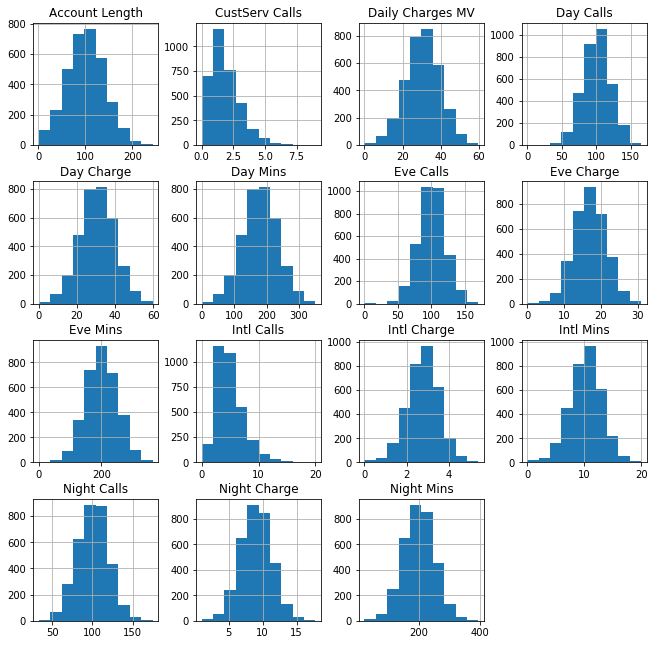

In [19]:
#numcols.loc[:,(numcols.dtypes=='float64') ].hist(figsize=[11,11])
numcols.hist(figsize=[11,11])

In [20]:
#plt.scatter(df['VMail Message'], df['Churn'])
#plt.hist(df['VMail Message'],df['VMail Plan'])
#plt.hist(df['VMail Message'])
#plt.xlabel('VMail Message')
#plt.show()
#plt.scatter(df['VMail Plan'], df['Churn'])


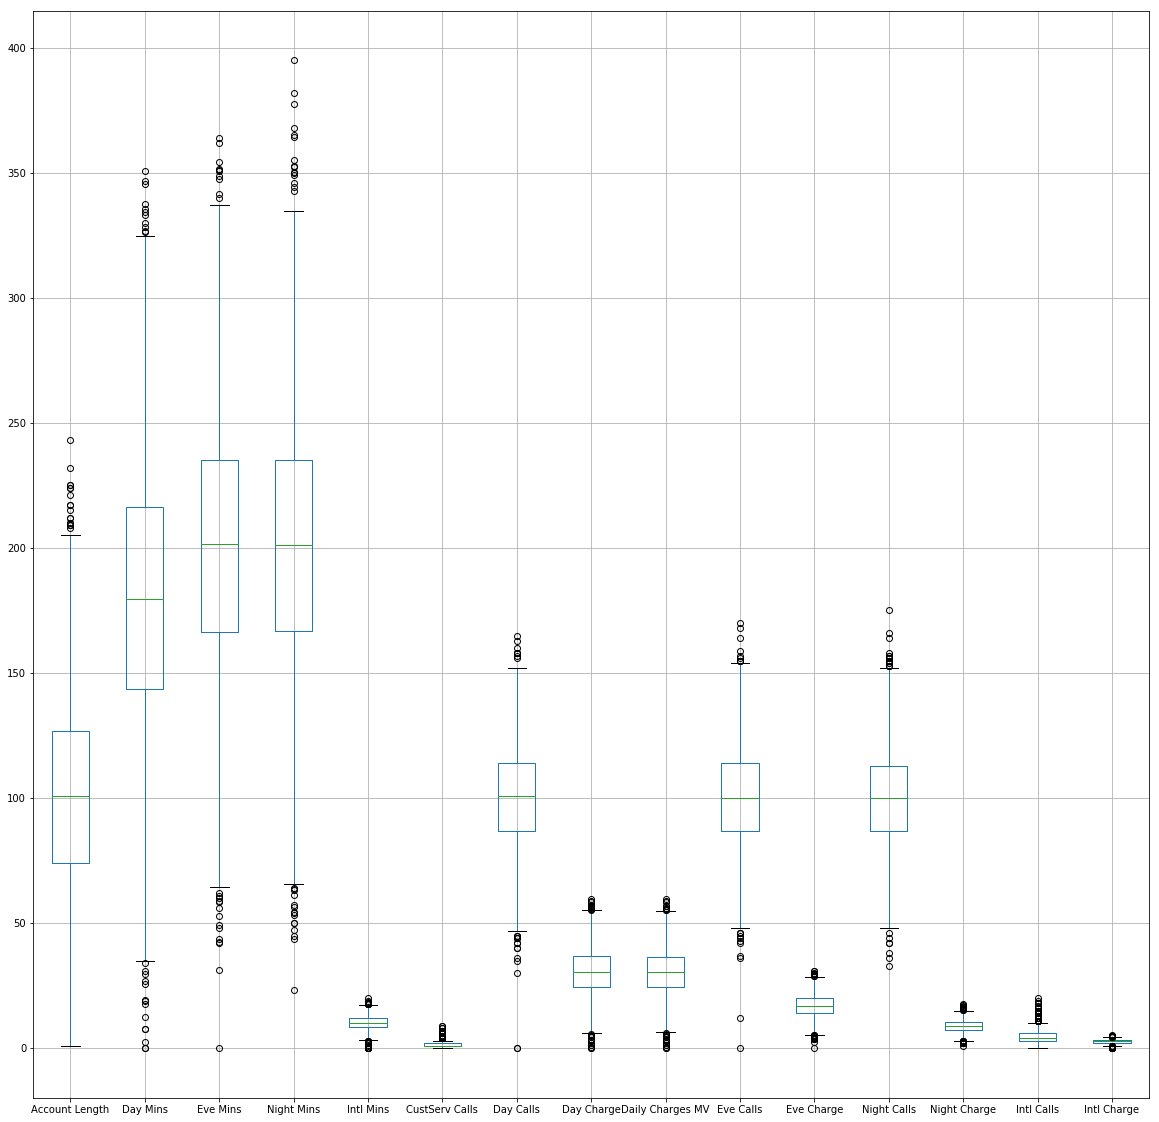

In [21]:
numcols.boxplot(column=numcolsnames,figsize=[20,20])


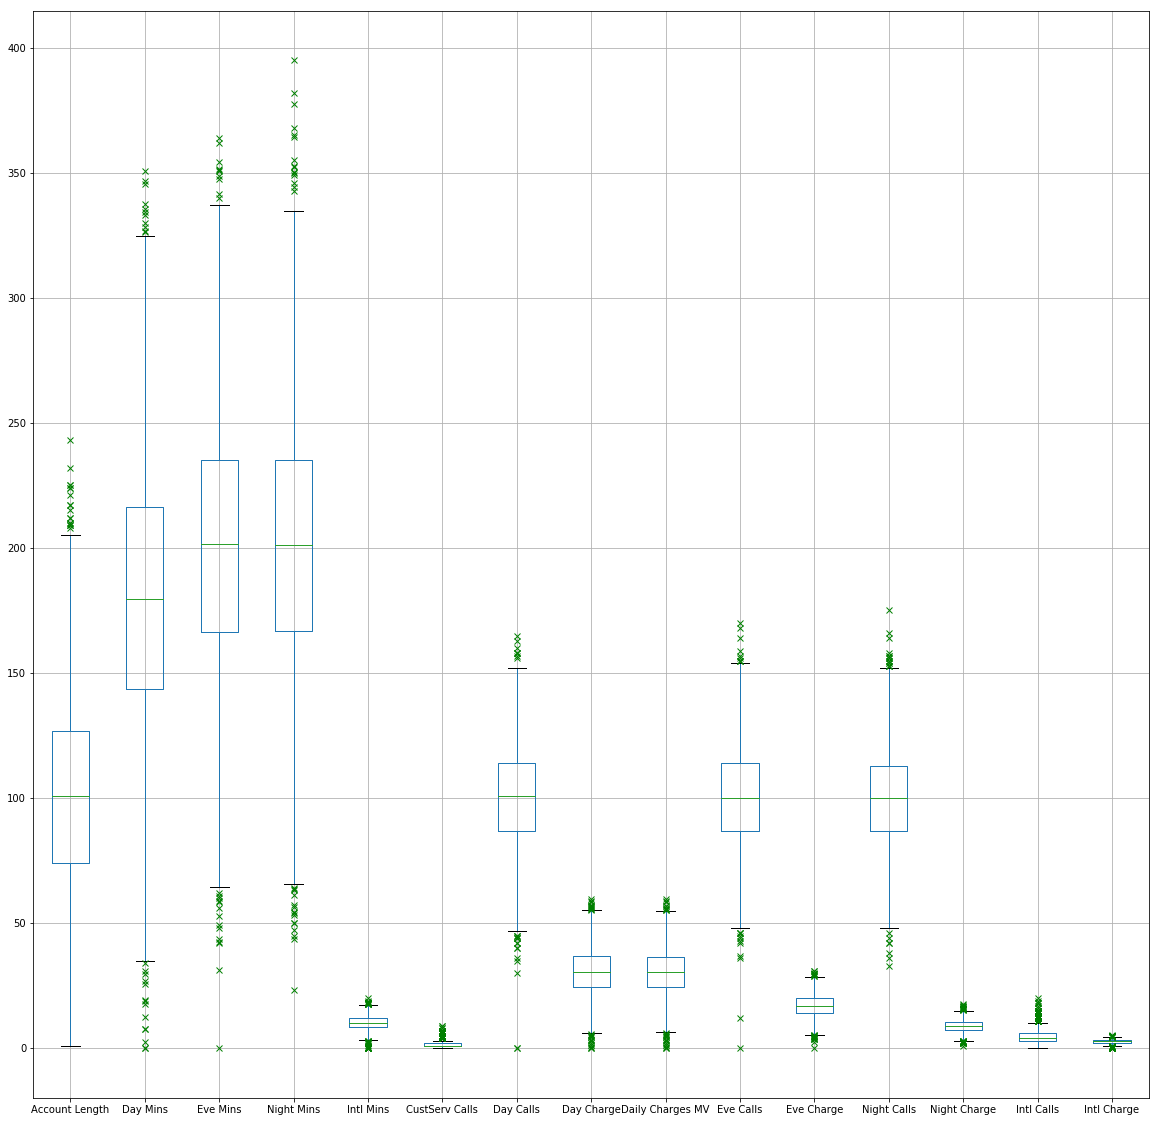

In [22]:
#df.corr()
#plt.matshow(df.corr())
numcols.boxplot(numcolsnames, sym='gx', notch=False,figsize=[20,20])



In [23]:
#plt.boxplot(df1['Account Length'], sym='gx', notch=False)
#help(plt.boxplot)

# Handling Outliers

In [24]:
x=numcols['Account Length'].quantile([0.25,0.5,0.75])
print(x.values)

[ 74. 101. 127.]


In [25]:
IQR=x[0.75]-x[0.25]
IQR15=IQR * 1.5
IQR15

79.5

In [26]:
U_W=x[.75]+IQR15
L_W=x[.25]-IQR15
print(U_W,L_W)

206.5 -5.5


In [27]:
print("Upper Outliers")
numcols['Account Length'][numcols['Account Length'] >U_W]


Upper Outliers


197     208.0
238     215.0
309     209.0
416     224.0
817     243.0
1045    217.0
1093    210.0
1387    212.0
1408    232.0
1551    225.0
1751    225.0
1886    224.0
2150    212.0
2259    210.0
2277    217.0
2700    209.0
3216    221.0
3227    209.0
Name: Account Length, dtype: float64

In [28]:
print("Lower Outliers")
numcols['Account Length'][numcols['Account Length'] < L_W]

Lower Outliers


Series([], Name: Account Length, dtype: float64)

In [29]:
W = numcols['Account Length'].quantile([0.05,0.95])
W


0.05     35.0
0.95    167.0
Name: Account Length, dtype: float64

In [30]:
numcols['Account Length'][numcols['Account Length'] >U_W]= W[0.95]

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [31]:
print('Upper outliers')
numcols['Account Length'][numcols['Account Length'] >U_W]
#plt.boxplot(numcols['Account '])

Upper outliers


Series([], Name: Account Length, dtype: float64)

In [16]:
numcolsnames=['Account Length','Day Mins','Eve Mins','Night Mins','Intl Mins','CustServ Calls','Day Calls',\
             'Day Charge','Daily Charges MV','Eve Calls','Eve Charge','Night Calls','Night Charge',\
             'Intl Calls','Intl Charge']
for i in numcolsnames:
    x=numcols[i].quantile([0.25,0.5,0.75])
    IQR=x[0.75]-x[0.25]
    IQR15=IQR * 1.5
    U_W=x[.75]+IQR15
    L_W=x[.25]-IQR15
    W = numcols[i].quantile([0.05,0.95])
    numcols[i][numcols[i] >U_W]= W[0.95]
    numcols[i][numcols[i] <L_W]= W[0.05]

C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


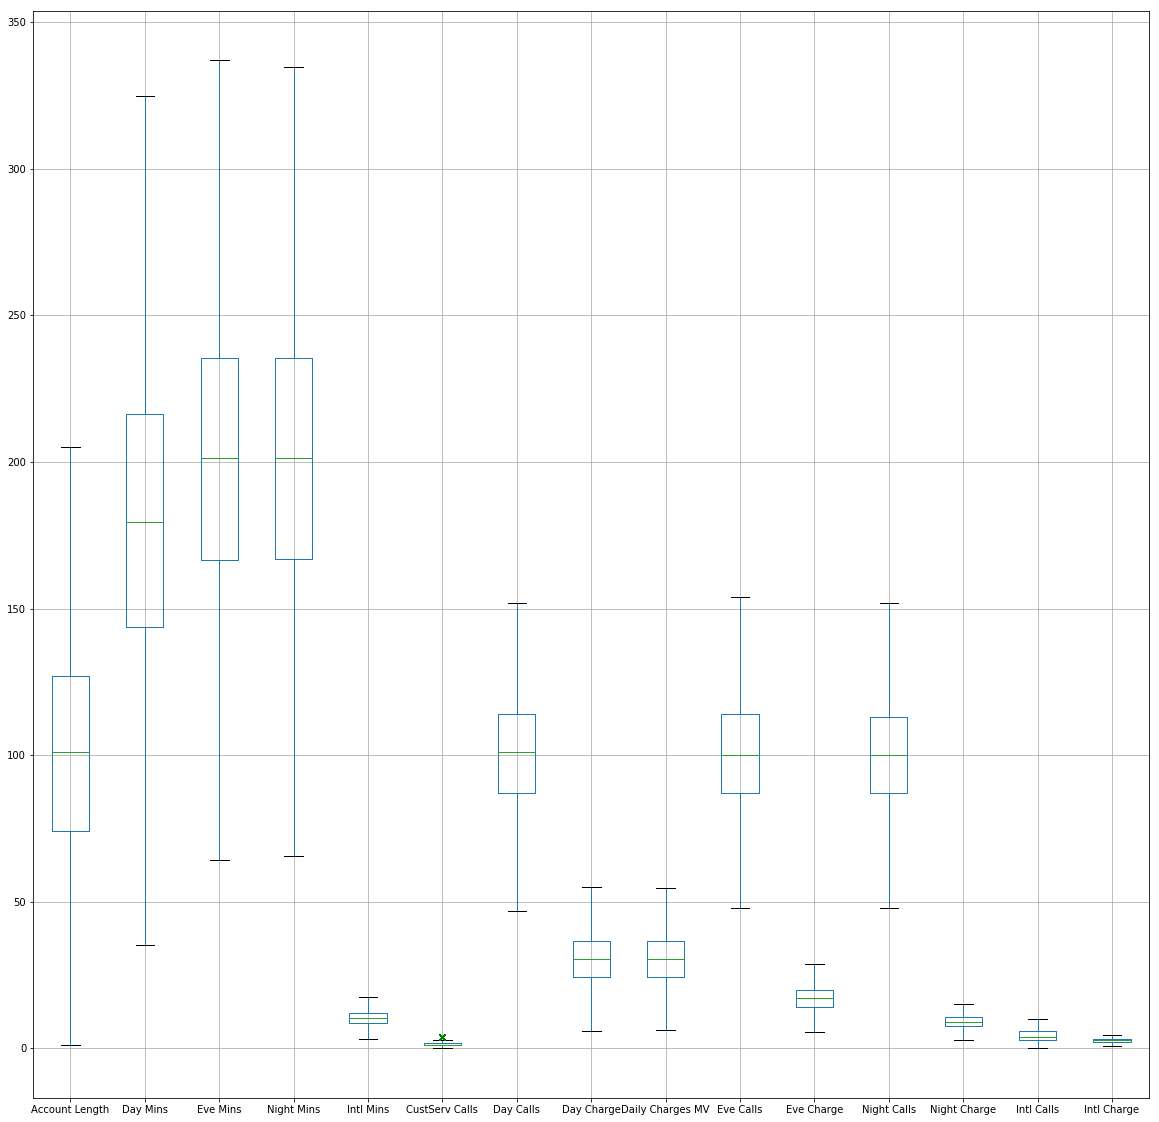

In [33]:
numcols.boxplot(numcolsnames, sym='gx', notch=False,figsize=[20,20])
#help(plt.boxplot)
#plt.boxplot(numcols['Account Length'], sym='gx', notch=False)
#numcols
#numcols.describe()

In [34]:
numcolsnames=['Account Length']#,'Day Mins','Eve Mins','Night Mins','Intl Mins','CustServ Calls','Day Calls',\
             #'Day Charge','Daily Charges MV','Eve Calls','Eve Charge','Night Calls','Night Charge',\
             #'Intl Calls','Intl Charge']
for i in numcolsnames:
    x=numcols[i].quantile([0.25,0.5,0.75])
    print(x)
    IQR=x[0.75]-x[0.25]
    IQR15=IQR * 1.5
    print(IQR15)
    U_W=x[.75]+IQR15
    L_W=x[.25]-IQR15
    print(U_W,L_W)
    W = numcols[i].quantile([0.05,0.95])
    print(W)
    numcols[i][numcols[i] >U_W]= W[0.95]
    numcols[i][numcols[i] <L_W]= W[0.05]

0.25     74.0
0.50    101.0
0.75    127.0
Name: Account Length, dtype: float64
79.5
206.5 -5.5
0.05     35.0
0.95    167.0
Name: Account Length, dtype: float64


C:\Users\dell\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


{'boxes': [<matplotlib.lines.Line2D at 0x6e3160dc50>],
 'caps': [<matplotlib.lines.Line2D at 0x6e316136a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x6e3161b358>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x6e31613ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x6e3160dda0>,
  <matplotlib.lines.Line2D at 0x6e31613278>]}

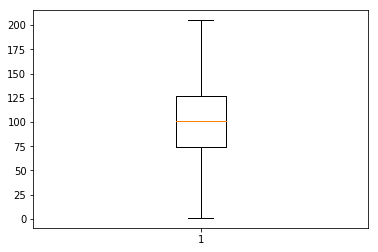

In [35]:
#numcols['Account Length']
plt.boxplot(numcols['Account Length'], sym='gx', notch=False)

# EDA

Text(0.5,1,'Impact of Intl Plan on Churn')

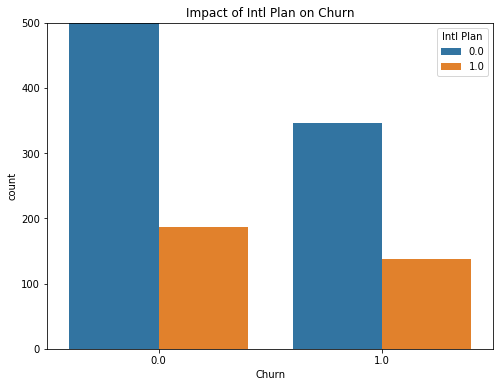

In [36]:
# Impact of Intl calls and Intl Plan on Churn
import seaborn as sns
fig, ax=plt.subplots(figsize=(8,6))

sns.countplot(x='Churn', data=df1, hue='Intl Plan')
ax.set_ylim(0,500)
plt.title("Impact of Intl Plan on Churn")

Text(0.5,1,'Impact of VMail Plan on Churn')

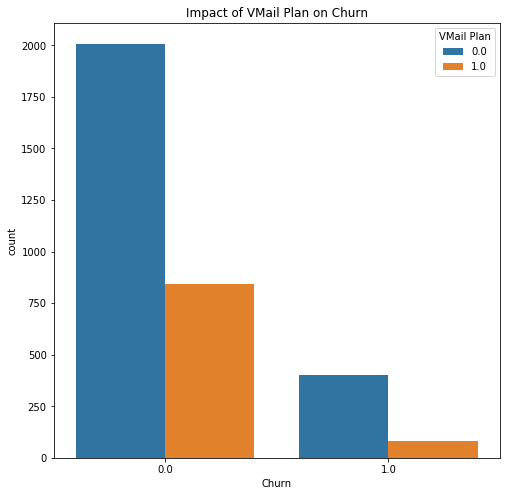

In [37]:
fig, ax=plt.subplots(figsize=(8,8))
sns.countplot(x='Churn',data=df,hue='VMail Plan')
#ax.set_ylim(0,)
plt.title("Impact of VMail Plan on Churn")

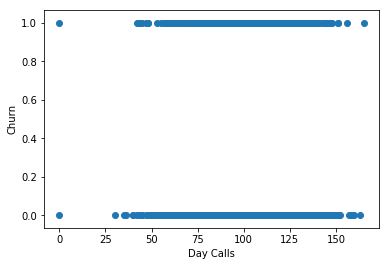

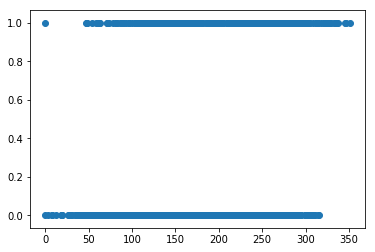

In [38]:
plt.scatter(df['Day Calls'], df['Churn'])
plt.xlabel('Day Calls')
plt.ylabel('Churn')
plt.show()
plt.scatter(df['Day Mins'], df['Churn'])



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006E32DA46D8>,
      dtype=object)

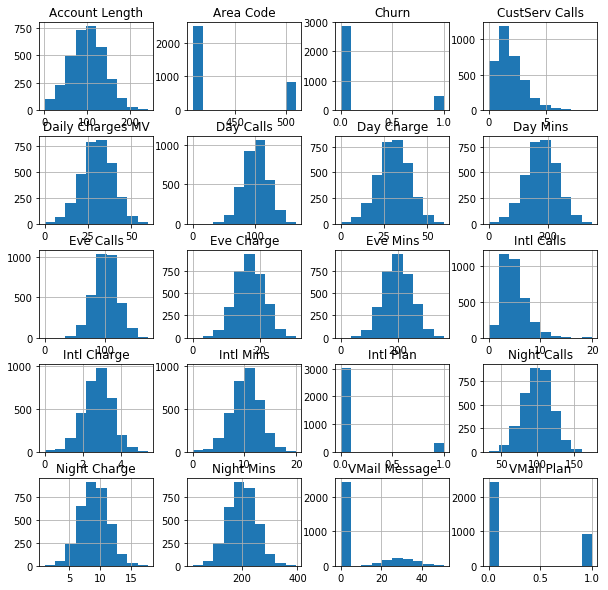

In [39]:
df.hist(figsize=[10,10])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006E34721B70>,
      dtype=object)

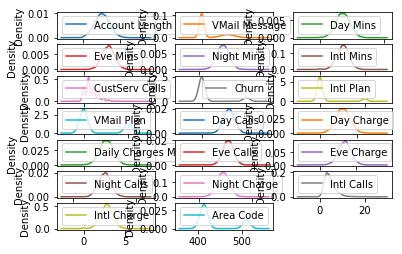

In [40]:
df.plot(kind='density',subplots=True,sharex=False,layout=(7,3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000006E34939550>]],
      dtype=object)

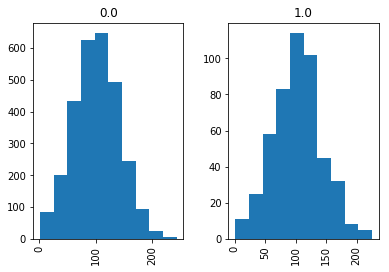

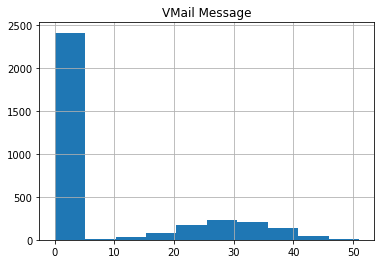

In [41]:
#numcols.loc[:,(numcols.dtypes=='float64') ].hist(figsize=[11,11])
df.hist('Account Length','Churn')
df.hist('VMail Message')
#plt.hist[df1['Account Length']]

In [42]:
#df.plot(x='Churn',y=['VMail Message','Intl Plan','Account Length'],kind='Bar',width=1)

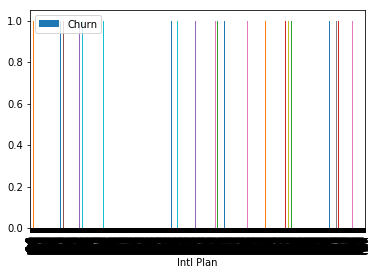

In [43]:
df.plot(x='Intl Plan',y='Churn',kind='Bar',width=1,stacked=True)

In [44]:
#plt.bar(index,df['Intl Plan'],bar_width,color='b',label='Intl Plan')
#plt.bar(index,df['Churn'],bar_width,color='c',label='Churn')
#rects1 = plt.bar(index, means_frank, bar_width,
#                 alpha=opacity,
 #                color='b',
 #                label='Frank')
#df[['Intl Plan','Churn']].plot(kind='bar', title ="Comp", figsize=(15, 10), legend=True, fontsize=12,width=1)

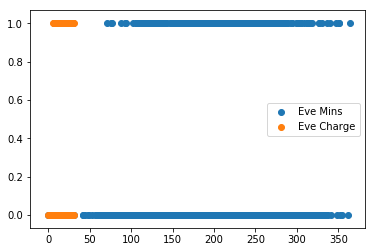

In [45]:
plt.scatter(df['Eve Mins'], df['Churn'])
plt.scatter(df['Eve Charge'],df['Churn'])
plt.legend(('Eve Mins','Eve Charge'))
#Drop Eve Charge
#Day Mins, Day Charge,Daily Charges MV
#--Eve Mins, Eve Charge
#--Night Mins, Night Charge
#--Intl Mins, Intl Charge

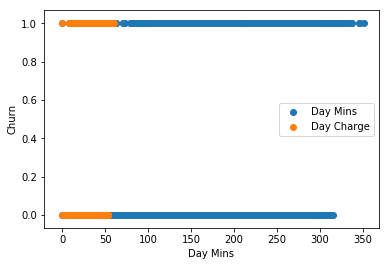

In [46]:
plt.scatter(df['Day Mins'],df['Churn'])
plt.xlabel('Day Mins')
plt.ylabel('Churn')
plt.scatter(df['Day Charge'],df['Churn'])
plt.legend(('Day Mins','Day Charge'))
#Drop Day Charge

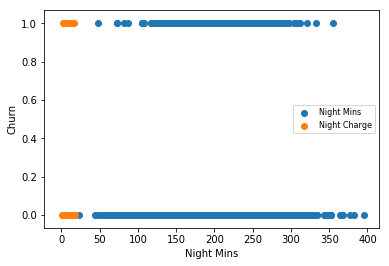

In [47]:
plt.scatter(df['Night Mins'],df['Churn'])
plt.xlabel('Night Mins')
plt.ylabel('Churn')
plt.scatter(df['Night Charge'],df['Churn'])
plt.legend(('Night Mins','Night Charge'),fontsize=8)
#Drop Night Charge

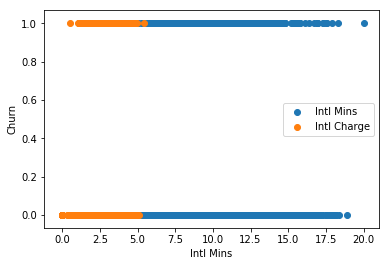

In [48]:
plt.scatter(df['Intl Mins'],df['Churn'])

plt.xlabel('Intl Mins')
plt.ylabel('Churn')
plt.scatter(df['Intl Charge'],df['Churn'])
plt.legend(('Intl Mins','Intl Charge'),fontsize=10)
#Drop Intl Charge

# Dropping Highly corelated columns after comparing its effect on target variable

In [17]:
numcols2=numcols.drop(['Intl Charge','Night Charge','Day Charge','Eve Charge'],axis=1)
numcols2=pd.DataFrame(numcols2)
numcols2.head()
#numcols.columns


,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,Intl Calls
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,3.0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,3.0
2,137.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,110.0,104.0,5.0
3,84.0,299.4,118.8,196.9,6.6,2.0,71.0,50.90,88.0,89.0,7.0
4,75.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,122.0,121.0,3.0


In [50]:
#
#numcols1.columns=numcols1names
#numcols1.head(2)
numcols1.head(1)


NameError: name 'numcols1' is not defined

# Adding categorical columns to the dataset and applying dummies on catcols

In [18]:
from sklearn import preprocessing
cols=preprocessing.normalize(numcols2)
cols=pd.DataFrame(numcols2)
#numcols1.columns=numcols1names
#normalized_X = preprocessing.normalize(X)
cols.head()
#numcols1.describe()
#numcols1=minmaxscaling
#cols.describe()

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,Intl Calls
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,3.0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,3.0
2,137.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,110.0,104.0,5.0
3,84.0,299.4,118.8,196.9,6.6,2.0,71.0,50.90,88.0,89.0,7.0
4,75.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,122.0,121.0,3.0


In [19]:
cols=cols.join(catcols,how='outer')
cols.dtypes
cols.head()

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,Intl Calls,VMail Message,Intl Plan
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,3.0,25.0,0.0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,3.0,26.0,0.0
2,137.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,110.0,104.0,5.0,0.0,0.0
3,84.0,299.4,118.8,196.9,6.6,2.0,71.0,50.90,88.0,89.0,7.0,0.0,1.0
4,75.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,122.0,121.0,3.0,0.0,1.0


In [20]:
colsnames=['Account Length','Day Mins','Eve Mins','Night Mins','Intl Mins','CustServ Calls','Day Calls',\
               'Daily Charges MV','Eve Calls','Night Calls',\
                 'Intl Calls','VMail Message','Intl Plan']
cols.columns=colsnames
cols.head()



,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,Intl Calls,VMail Message,Intl Plan
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,3.0,25.0,0.0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,3.0,26.0,0.0
2,137.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,110.0,104.0,5.0,0.0,0.0
3,84.0,299.4,118.8,196.9,6.6,2.0,71.0,50.90,88.0,89.0,7.0,0.0,1.0
4,75.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,122.0,121.0,3.0,0.0,1.0


In [21]:
cols.dtypes
cols['VMail Message']=cols['VMail Message'].astype('category')
cols['Intl Plan']=cols['Intl Plan'].astype('category')

In [22]:
cols=pd.get_dummies(cols,prefix=['VMail Message','Intl PLan'],drop_first=True)
cols.head(2)
#cols=numcols.join(catcols,how='outer')
#cols.head()

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,...,VMail Message_43.0,VMail Message_44.0,VMail Message_45.0,VMail Message_46.0,VMail Message_47.0,VMail Message_48.0,VMail Message_49.0,VMail Message_50.0,VMail Message_51.0,Intl PLan_1.0
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,...,0,0,0,0,0,0,0,0,0,0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

#Churn_data=cols.join(output,how='outer')
#Churn_data.head()

In [ ]:
#Churn_data['Churn'].value_counts()
#output

# Building the model before before handling Class Imbalance i.e., Oversampling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cols,output, 
                                                    test_size=0.3,
                                                    random_state=0)
#X_train
#y_train


In [25]:
model=LogisticRegression()
model=model.fit(X_train,y_train)

In [26]:
preds = model.predict(X_test)
#y_pred-- Arrays
preds[1]

0.0

In [27]:
predsTrain=model.predict(X_train)


In [ ]:
probs=model.predict_proba(X_test)
probs[1]

In [ ]:
#print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

In [28]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

        0.0       0.88      0.98      0.93       862
        1.0       0.57      0.15      0.24       138

avg / total       0.84      0.87      0.83      1000



In [29]:
print(classification_report(y_train,predsTrain))

             precision    recall  f1-score   support

        0.0       0.87      0.98      0.92      1988
        1.0       0.61      0.18      0.28       345

avg / total       0.83      0.86      0.83      2333



# To find the (columns) co efficients impact on the model

In [ ]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
import pandas as pd

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(numcols1,output, 
                                                    test_size=0.3,
                                                    random_state=1)
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
#X_train1.dtypes
#X_train1['VMail Message'].astype(float)
#cols['VMail Message']=cols['VMail Message'].astype(float)
#cols['Intl Plan']=cols['Intl Plan'].astype(float)
#cols.dtypes
#output=output.astype(float)
#output.head()
#y_train1.dtypes
#y_test1.dtypes
#y_test1

In [ ]:
#model1=sm.Logit(y_train.astype(float),X_train.astype(float))
y_train1=list(y_train1)
model1=sm.Logit(y_train1,X_train1)
model1=model1.fit()
#y_train.dtype
#X_test1.head()
#X_test1.dtypes
#y_test1.head()
#X_pred1= model1.predict(X_train1)
#X_pred1
#
#print("Accuracy: ", metrics.accuracy_score(X_test1, X_pred1))

In [ ]:
print(model1.summary())

In [ ]:
Churn_count = df1.Churn.value_counts()
df1_class_1=df1[df1.Churn==1]
df1_class_0=df1[df1.Churn==0]
print(df1_class_1)
count_class_0=Churn_count[0]
print('Class 0:', Churn_count[0])
print('Class 1:', Churn_count[1])
print('Proportion:', round(Churn_count[0] / Churn_count[1], 2), ': 1')

Churn_count.plot(kind='bar', title='Count (Churn)');


# Applying over sampling to handle class imbalance

In [30]:
sampledcols=cols.join(output,how='outer')
sampledcols.head(2)
#sampledcols=cols

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,...,VMail Message_44.0,VMail Message_45.0,VMail Message_46.0,VMail Message_47.0,VMail Message_48.0,VMail Message_49.0,VMail Message_50.0,VMail Message_51.0,Intl PLan_1.0,Churn
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,...,0,0,0,0,0,0,0,0,0,0.0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,...,0,0,0,0,0,0,0,0,0,0.0


2850
Class 0: 2850
Class 1: 483
Proportion: 5.9 : 1


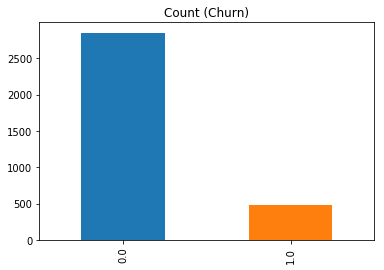

In [31]:
Churn_count = sampledcols.Churn.value_counts()
class_1=sampledcols[sampledcols.Churn==1]
class_0=sampledcols[sampledcols.Churn==0]

count_class_0=Churn_count[0]
print(count_class_0)
print('Class 0:', Churn_count[0])
print('Class 1:', Churn_count[1])
print('Proportion:', round(Churn_count[0] / Churn_count[1], 2), ': 1')

Churn_count.plot(kind='bar', title='Count (Churn)');


Random over-sampling:
1.0    2850
0.0    2850
Name: Churn, dtype: int64


,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,...,VMail Message_44.0,VMail Message_45.0,VMail Message_46.0,VMail Message_47.0,VMail Message_48.0,VMail Message_49.0,VMail Message_50.0,VMail Message_51.0,Intl PLan_1.0,Churn
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,...,0,0,0,0,0,0,0,0,0,0.0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,...,0,0,0,0,0,0,0,0,0,0.0
2,137.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,110.0,104.0,...,0,0,0,0,0,0,0,0,0,0.0
3,84.0,299.4,118.8,196.9,6.6,2.0,71.0,50.90,88.0,89.0,...,0,0,0,0,0,0,0,0,1,0.0
4,75.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,122.0,121.0,...,0,0,0,0,0,0,0,0,1,0.0


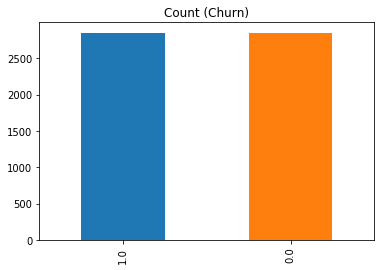

In [32]:
sampledcols_class1_over=class_1.sample(count_class_0,replace=True)
#print(sampledcols_class1_over)
sampledcols_over=pd.concat([class_0,sampledcols_class1_over],axis=0)
#df1_class_1_over = df1_class_1.sample(count_class_0, replace=True)
#df1_test_over = pd.concat([df1_class_0, df1_class_1_over], axis=0)

print('Random over-sampling:')
print(sampledcols_over.Churn.value_counts())

sampledcols_over.Churn.value_counts().plot(kind='bar', title='Count (Churn)');
#cols
sampledcols_over.head()

# Seperating target variable i.e., Churn

In [33]:
#Churn=sampledcols_over.head(2)
y=sampledcols_over['Churn']
X=sampledcols_over.drop(['Churn'],axis=1)
#X.head(1)
#X.head()
#y.head(1)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)
#Xo_train.head()
#yo_train.head()


In [35]:
model=LogisticRegression()
model=model.fit(X_train,y_train)

In [36]:
preds=model.predict(X_test)


In [37]:
predst=model.predict(X_train)

# Getting clarity between actuals and predicted values

In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(preds,y_test))

[[655 180]
 [212 663]]


In [ ]:
print(confusion_matrix(y_test,preds))

# Check if the model is over fitting

In [39]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

        0.0       0.78      0.76      0.77       867
        1.0       0.76      0.79      0.77       843

avg / total       0.77      0.77      0.77      1710



In [40]:
print(classification_report(y_train,predst))

             precision    recall  f1-score   support

        0.0       0.75      0.75      0.75      1983
        1.0       0.75      0.75      0.75      2007

avg / total       0.75      0.75      0.75      3990



In [ ]:
#print(y_test,preds)

# Check the model using crossval

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import precision_score,recall_score
from sklearn.model_selection import cross_val_score,cross_validate

In [ ]:
#scoring = {'acc': 'accuracy',
  #         'prec': 'precision',
 #          'rec': 'recall'}
#scores=cross_validate(model,X,y,cv=10,n_jobs=-1,scoring=scoring)
#print(scores.keys())
#print(scores['test_acc']) 
print ("Recall :")
cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='recall',).mean()






In [ ]:
print ("Precision :")
cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='precision',).mean()

In [ ]:
print ("f1 :")
cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='f1',).mean()

In [ ]:
print ("Accuracy :")
cross_val_score(model,X,y,cv=10,n_jobs=-1,scoring='accuracy',).mean()

In [ ]:
#help(cross_val_score)

# Decision Trees

In [ ]:
churn=sampledcols_over
churn.head()

# Seperate Target Variable

In [ ]:
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [ ]:
y=churn['Churn']
X=churn.drop(['Churn'],axis=1)

In [ ]:
DTC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=4,
                             class_weight='balanced',
                            min_samples_split=10)
#Tune the hyper parameters for better metrics.Lets do that in Random forest model.

In [ ]:
#X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.3, random_state=123)--no need of seperating train and test
#sets everytime. We can use the same splits that were created above 

In [67]:
DTC.fit(X_train,y_train)


NameError: name 'DTC' is not defined

In [ ]:
predsDTC=DTC.predict(X_test)
print(classification_report(y_test,predsDTC))

In [ ]:
predsDTCT=DTC.predict(X_train)
print(classification_report(y_train,predsDTCT))

In [ ]:
with open("decisiontree.dot", 'w') as f:
    f = export_graphviz(DTC, out_file=f,feature_names=X.columns.values,filled=True, rounded=True,special_characters=True,class_names=['0','1'], proportion=True)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
RFC=RandomForestClassifier(class_weight='balanced',n_jobs=-1)

# Grid Search CV

In [ ]:
param_grid = { 
    'n_estimators': [1000,1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf' :[4,5,6,7,8]
}


In [ ]:
CV_RFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10)

In [ ]:
#CV_RFC.fit(X_train,y_train)

In [ ]:
predsRFC=RFC.predict(X_test)
print(classification_report(y_test,predsRFC))

In [53]:
predsRFCT=RFC.predict(X_train)
print(classification_report(y_train,predsRFCT))



NameError: name 'RFC' is not defined

# Kmeans clustering

In [20]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,...,45.07,99.0,16.78,91.0,11.01,3.0,2.7,KS,415.0,382-4657
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,...,27.47,103.0,16.62,103.0,11.45,3.0,3.7,OH,415.0,371-7191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#clust=df.iloc[:,[20,21]]
clust=df[['Area Code','State']]
clust.head()


,Area Code,State
0,NaN,NaN
1,415.0,KS
2,NaN,NaN
3,415.0,OH
4,NaN,NaN


In [61]:
clust=clust.dropna(how='all')
#clust=clust.fillna(clust.mean(),inplace=True)

#
#clust.head()

In [62]:
#clust.reset_index(drop=True,inplace=True)
type(clust)
clust.dtypes

Area Code    float64
State         object
dtype: object

In [63]:
clust.head()

,Area Code,State
1,415.0,KS
3,415.0,OH
5,415.0,NJ
7,408.0,OH
9,415.0,OK


In [68]:
#clust.groupby(['Area Code','State'])
clust1=clust.groupby(["Area Code", "State"],as_index=False).size()
clust1=clust1.to_frame(name = 'size')#.reset_index()
clust1.head()

size
Area Code State      
408.0     AK       14
          AL       25
          AR       13
          AZ       15
          CA        7

In [69]:
clust2=clust1[['size']]

In [70]:
from sklearn.cluster import KMeans
kmeans=KMeans()
kmeans=kmeans.fit(clust2)

In [71]:
clusters=kmeans.predict(clust2)

In [72]:
centroids=kmeans.cluster_centers_
print(centroids)

[[15.56097561]
 [35.        ]
 [23.76470588]
 [40.33333333]
 [19.47826087]
 [28.8125    ]
 [11.60714286]
 [49.5       ]]


In [73]:
#print(clusters)
clusters=pd.DataFrame(clusters)
colname=['cluster']
clusters.columns=colname
clusters.head()

,cluster
0,0
1,2
2,6
3,0
4,6


In [76]:
df_clust=clust1.join(clusters,how='outer')
df_clust.head(2)

ValueError: cannot join with no level specified and no overlapping names

In [49]:
df.head(1)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# ANN

In [41]:
churn_ANN=cols

In [42]:
churn_ANN.head()

,Account Length,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Daily Charges MV,Eve Calls,Night Calls,...,VMail Message_43.0,VMail Message_44.0,VMail Message_45.0,VMail Message_46.0,VMail Message_47.0,VMail Message_48.0,VMail Message_49.0,VMail Message_50.0,VMail Message_51.0,Intl PLan_1.0
0,128.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,99.0,91.0,...,0,0,0,0,0,0,0,0,0,0
1,107.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,103.0,103.0,...,0,0,0,0,0,0,0,0,0,0
2,137.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,110.0,104.0,...,0,0,0,0,0,0,0,0,0,0
3,84.0,299.4,118.8,196.9,6.6,2.0,71.0,50.90,88.0,89.0,...,0,0,0,0,0,0,0,0,0,1
4,75.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,122.0,121.0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
Xc=churn_ANN
#Xc.Churn.head()
yc=output
#yc.head()


In [74]:
from sklearn.preprocessing import StandardScaler,Normalizer

from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test=train_test_split(Xc,yc,test_size=0.3,random_state=1)

In [76]:
sc=StandardScaler()
#X_train.sum().isnull()
#np.isnan(X_train).any()

In [77]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
X_train

array([[-0.03013182, -2.3667685 , -0.56106585, ..., -0.02929165,
        -0.02070788, -0.31860769],
       [ 0.60432243,  0.25160755,  0.81115406, ..., -0.02929165,
        -0.02070788, -0.31860769],
       [-0.25853534,  0.77829238, -0.27854999, ..., -0.02929165,
        -0.02070788, -0.31860769],
       ...,
       [-0.18240084, -1.54664497,  0.98469952, ..., -0.02929165,
        -0.02070788, -0.31860769],
       [ 0.98499497, -0.86947875,  0.21181684, ..., -0.02929165,
        -0.02070788, -0.31860769],
       [ 0.80734778, -0.11519082,  0.9039807 , ..., -0.02929165,
        -0.02070788, -0.31860769]])

In [75]:
#nz=Normalizer()
#X_train=nz.fit_transform(X_train)
#X_test=nz.fit_transform(X_test)



In [78]:
#import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import Normalizer

In [79]:
classifier=Sequential()

In [84]:
classifier.add(Dense(units=16,activation='sigmoid',kernel_initializer='uniform',input_dim=57))

In [88]:
classifier.add(Dense(units=16,activation='sigmoid',kernel_initializer='uniform'))

In [89]:
classifier.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))

In [90]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
classifier.fit(X_train,y_train,epochs=10)

Epoch 1/10
2333/2333 [==============================] - 1s 631us/step - loss: 0.6087 - acc: 0.7823
Epoch 2/10
2333/2333 [==============================] - 0s 98us/step - loss: 0.4520 - acc: 0.8551
Epoch 3/10
2333/2333 [==============================] - 0s 98us/step - loss: 0.4161 - acc: 0.8551
Epoch 4/10
2333/2333 [==============================] - 0s 100us/step - loss: 0.4138 - acc: 0.8551
Epoch 5/10
2333/2333 [==============================] - 0s 99us/step - loss: 0.4139 - acc: 0.8551
Epoch 6/10
2333/2333 [==============================] - 0s 99us/step - loss: 0.4142 - acc: 0.8551
Epoch 7/10
2333/2333 [==============================] - 0s 99us/step - loss: 0.4136 - acc: 0.8551
Epoch 8/10
2333/2333 [==============================] - 0s 100us/step - loss: 0.4135 - acc: 0.8551
Epoch 9/10
2333/2333 [==============================] - 0s 101us/step - loss: 0.4133 - acc: 0.8551
Epoch 10/10
2333/2333 [==============================] - 0s 103us/step - loss: 0.4129 - acc: 0.8551


In [92]:
y_pred = classifier.predict(X_test) > 0.5


In [50]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.85      1.00      0.92       855
        1.0       0.00      0.00      0.00       145

avg / total       0.73      0.85      0.79      1000



C:\Users\dell\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
y_predtrain=classifier.predict(X_train) >0.5

In [83]:
print(classification_report(y_train,y_predtrain))

             precision    recall  f1-score   support

        0.0       0.86      1.00      0.92      1995
        1.0       0.61      0.04      0.08       338

avg / total       0.82      0.86      0.80      2333

